# Did you pee in the sea?
* Topics: Chemistry, water molecules of the world, binomial probability, Avogadro constant, isotopes, unit conversion, for loop in Python

## Task
* Even if you have never involved yourself in this polluting and abominable activity, I swear that thousands if not millions are doing it right now.
* The chemistry experiment goes like this.
  1. You pee in the glass (300 ml) and pour it in the ocean
  2. Then you wait until your pee perfectly mixes in all the oceans of the world (This would take impossibly long, so we just assume the perfect mixing).
  3. And then you draw the same glass of water out of the sea.


## Questions
* What is the average number of molecules of your pee in that glass of water?
* What is the probability of having more than 2300 molecules of your pee in the glass?
* If you take one of the strongest poisons we know of, $\mathrm{^{210}Po}$, how many atoms in the glass will kill you?

In [1]:
from scipy.stats import binom, hypergeom
import scipy.constants as const

import numpy as np
import matplotlib.pyplot as plt

## Let's first see how much water there is in the World's ocean?
Thanks to [wikipedia page](https://en.wikipedia.org/wiki/Ocean), that is not hard to find:

* approximately 1.335 billion cubic kilometers
* cubic km is a cube with a side of 1km and we have 1 335 000 000 of them

In [2]:
## what is the conversion factor to convert cubic km to litre
## hint 1 litre is 1 cubic dm
km3_to_litres = 10000**3

# now calculate how many litres all the ocean contain (use your km3_to_litres factor)
water_total = 1.335e9 * km3_to_litres  # in litres

### But we are asking about number of molecules, so we need to find out how many water molecules are in 1 litre?

That comes at the price of knowledge what a unit mol is. Definition is quite arbitrary actually (and has changed throughout the history):
  * 1 mole is the number of atoms in 12 g of carbon $\mathrm{^{12}_{6}C}$. It is called **Avogadro's constant**, and you can guess that it must be a big number since atoms are pretty small. We will see soon. 
  * And 12 is also *standard atomic weight* of carbon. It is not exactly 12, because of different isotopes of $\mathrm{_{6}C}$ appearing in pure carbon samples. And some other recent, but for us insignicicant [technical changes](https://en.wikipedia.org/wiki/2019_redefinition_of_the_SI_base_units#Mole) too.
  * The important for us is the following. We can take *standard atomic weight* for 2 hydrogen and 1 oxygen atoms in our $\mathrm{H_{2}O}$ and we get very precisely weight of 1 mole of $\mathrm{H_{2}O}$:
    
$\mathrm{m_{water}=18.02\,g\cdot{mol^{-1}}}$,
  together with density of water approximately $\mathrm{1000\,g/l}$, you can calculate how many moles are in 1 litre of water.
  
### Sidenotes
  1. The 6 from above is often omitted because calling an element carbon implies it has 6 protons. $\mathrm{^{12}C}$ signifies that this atom has also 6 neutrons (6 protons + 6 neutron = 12 nucleons). Changing the number of neutrons and keeping the element the same (== the same number of protons) gives you so called isotopes of particular element.
  2. There are 15 isotopes of carbon, $\mathrm{^{8}C}$ - $\mathrm{^{22}C}$, meaning carbons with 2 upto 16 neutrons. Only 2 are stable and 3 are naturally detectable. The rest is possible to prepare artificially, but have rapid radioactive.
  3. The above means that there is one carbon isotope, which appears in nature but is not stable, it is $\mathrm{^{14}C}$. Since its radioactive decay can take thousands of years, it is used in so called [radiocarbon dating](https://en.wikipedia.org/wiki/Radiocarbon_dating). Technique which allows to precisely figure out the age of archeological artifacts from organic matter such as bones, scrolls etc.

### Based on the above, calculate how many moles are in 1 litre of water

In [3]:
# mols of H2O in 1 liter
moles_per_liter = 1000/18.02

In [4]:
# Avogadro constant, as well as most of other constants are accessable from scipy.constants module.
# which I imported as const
const.Avogadro

6.02214076e+23

### I said above, that 1 mole contains Avogadro's constant ($\mathrm{N_A}$) of particles
  * So how many water molecules are there in the oceans?
  * Multiply litres in ocean with moles per litre -> moles in ocean -> times $\mathrm{N_A}$ -> number of molecules.

In [5]:
# total amount of molecules in oceans
molecules_water = water_total * moles_per_liter * const.Avogadro

### Now we do the same for a glass of lukewarm pee

In [6]:
# in molecules right away
molecules_glass = 0.3 * moles_per_liter * const.Avogadro # in molecules right away

In [7]:
# print the variable
molecules_glass

1.002576153163152e+25

In [8]:
## water molecules total
print(f' Total molecules of water in the oceans: {molecules_water}')
print(f' Total molecules in a glass of your pee: {molecules_glass}')

 Total molecules of water in the oceans: 4.461463881576027e+46
 Total molecules in a glass of your pee: 1.002576153163152e+25


That is quite a number of molecules, 4e+46 means that the 4 is followed by 46 zeros.

## Now is the time to answer the first question, how many pee molecules are we going to draw back into our glass?

In [9]:
# average is simply ratio of pee vs ocean * times the number of molecules in the glass (that part we already calculated)
pee_av = molecules_glass/molecules_water * (0.3 * moles_per_liter * const.Avogadro)
print(round(pee_av))

2253


### This is huge number until you realize how many normal water molecules are in your glass per one of the pee.

In [10]:
# 1 pee molecule per how many normal water ones?
round(molecules_glass/pee_av)

4450000000000001048576

In deed your pee got pretty diluted. The whole confusion for our heads is, that the molecules are so bloody small, therefore there are so many in one glass.

## Now comes the dreadful part of probability and combinations
  * In order to say what is the probability of having > 2300 pee molecules in the drawn glass.
  * For that purpose, we are going to use **Binomial distribution**, from `scipy.stats.binom()`
  * It is used for experiments drawing `n` samples out of total population of `N` possibilities. 
  * Additionally, we need only two possible results, success (drawwing pee molecule) or failure (drawing ocean molecule). 
  * Strictly speaking Binomial statistic works only if we would **REPLACE** the molecules we draw.
  * But in case of big `N>>n` (which is certainly true here), simple Binomial statistic will work perfectly.
  * The strictly correct statistic is called **Hypergeometric distribution**, from `scipy.stats.hypergeom()`
  
### I will show how different they work on a quick example here
  * Let's have a bag of 20 molecules, 5 poisonous and 15 safe ones.
  * If we draw the poisonous one, we lost the game.
  * We are going to draw 5 times, what is our chance of survival
  
1. First if we always replace the molecule we draw, we will always have a bag of 20 (5+15)
2. Every raound our chance of drawing safe molecule is 15/20.
3. Since we do 5 rounds, we calculate:

In [11]:
prob_binom = (15/20)*(15/20)*(15/20)*(15/20)*(15/20)  ## or shorter way: (15/20)**5
print(prob_binom)

0.2373046875


## Binomial distribution
### $Pr(k,n,p) = \binom{n}{k}p^k(1-p)^{n-k}$, 

where $\binom{n}{k}$ is a binomial coefficient

### $\binom{n}{k}=\dfrac{n!}{k!(n-k)!}$

`k` is how many success draw I want

`n` is total number of draws

`p` is the probability of success draw (here prob to draw safe molecule)

In [12]:
# The same think can do Python right away using so pmf method of the binom distribution
# pmf stands for probability mass function
binom.pmf(k=5, n=5, p=15/20)

0.2373046875

We have almost 24% chance of survival.

## It is clear we are replacing molecules, because our probability is always 15/20
  * If we DO NOT replace, then after drawing first safe molecule, in the bag would be only 19 molecules left, 5 poisonous and 14 safe
  * Therefore in the next round, our success probability drops to only 14/19

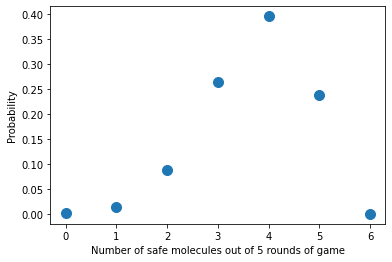

In [13]:
# Now calculate probabilities for all possible outcomes
hits = [0, 1, 2, 3, 4, 5, 6]  # how many safe molecules I draw in 5 rounds

plt.plot(hits, binom.pmf(hits, 5, 15/20), 'o', ms=10)
plt.xlabel('Number of safe molecules out of 5 rounds of game')
plt.ylabel('Probability')
plt.show()

In [14]:
# print the values to actually see them
binom.pmf(hits, 5, 15/20)

array([0.00097656, 0.01464844, 0.08789062, 0.26367187, 0.39550781,
       0.23730469, 0.        ])

### Every proper probability distribution needs to have sum of all the probabilities equal to 1
Note: For continuous probability distribution, the sum would be call integral, just in case you hear it somewhere

In [15]:
# try to check that yourself (sum of all the values from the graph.)
sum(binom.pmf(hits, 5, 15/20))

0.9999999999999998

Almost perfect 1, now second example with not replacing molecules.

## Hypergeometric distribution


In [16]:
prob_hyper = (15/20)*(14/19)*(13/18)*(12/17)*(11/16)
print(prob_hyper)

0.19369195046439627


In [17]:
hypergeom.pmf(k=5, M=20, n=15, N=5)

0.19369195046439577

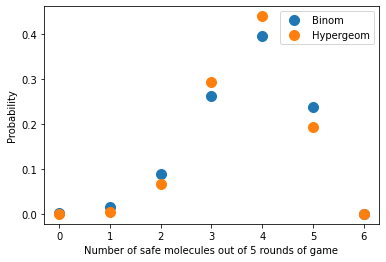

In [18]:
plt.plot(hits, binom.pmf(hits, 5, 15/20), 'o', ms=10, label='Binom')
plt.plot(hits, hypergeom.pmf(hits, M=20, n=15, N=5), 'o', ms=10, label='Hypergeom')
plt.xlabel('Number of safe molecules out of 5 rounds of game')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [19]:
## Check again the sum of all probabilities
sum(hypergeom.pmf(k=hits, M=20, n=15, N=5))

0.999999999999998

In [20]:
## difference based on changing only total number of molecules in the bag
diff = []

for i in range(20,2000):
    diff.append(sum(abs(binom.pmf(hits, 5, (i-5)/i) - hypergeom.pmf(hits, M=i, n=i-5, N=5))))

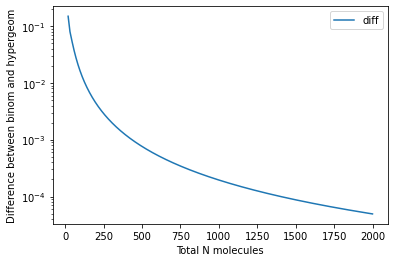

In [21]:
plt.plot(range(20,2000), diff, label='diff')
plt.yscale('log')
plt.xlabel('Total N molecules')
plt.ylabel('Difference between binom and hypergeom')
plt.legend()
plt.show()

You can pick yourself when is it good enough to use binomial instead of hypergeom, around N=500 seems pretty safe, which means N 100x times higher than our 5 poisonous molecules (n)

Note: For different number of poisonous molecules, the plot would be different!!

## It's clear we are fine with using `binom()` for our PEE vs SEA molecules.
  * Second question was What is the probability of having more than 2300 molecules of your pee in the glass?

In [22]:
n, p = molecules_glass, molecules_glass/molecules_water
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

In [23]:
print(mean, var, skew, kurt)

2252.9801194677566 2252.9801194677566 0.021067903491456985 0.00044385655752534546


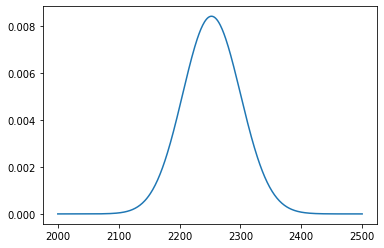

In [24]:
# create an array of 101 points between 2000 and 2500
x = np.linspace(2000, 2500, 501)

# for each x calculate binom probability (binom.pmf()) and plot it

plt.plot(x, binom.pmf(x, n, p))
plt.show()

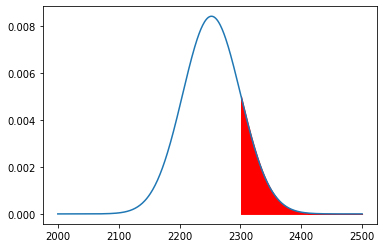

In [25]:
plt.plot(x, binom.pmf(x, n, p))
plt.fill_between(x[np.argmin(abs(2301-x)):],binom.pmf(x[np.argmin(abs(2301-x)):], n, p), color='red')
plt.show()

As we have already mentioned summing all the probabilities gives us 1, so that it covers every possible outcome.

We are interested for those outcomes, for pee molecules more than 2300, therefore summing all the points on the distribution will give us the probability

CAREFUL: This works only because we really sampled with our x axis values all the points, always adding plus one. If you skip some, the sum method will not work.

In [26]:
sum(binom.pmf(x[np.argmin(abs(2301-x)):], n, p))

0.1583758548435811

Almost 16% chance, you draw more than 3000 molecules

### We can do this in a more elegant fashion, using so called *cummulative distribution function* `binom.cdf()`
  * Which does exactly what we need, it goes over our x axis (number of drawn pee molecules) and at each step adds the probability
  * That's why this function always goes from zero to 1, for any kind of probability task.

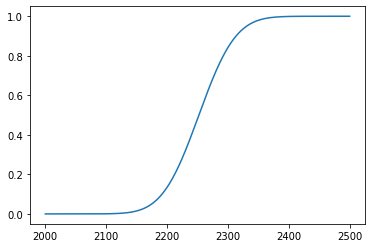

In [27]:
fig, ax = plt.subplots()
ax.plot(x, binom.cdf(x, n, p))
plt.show()

Since we need 2300 and more, we take the value on y axis for 2301, that is the prob of drawing 2300 and any less

And we need to subtract it from one, to get 2301 and more.

In [28]:
1-binom.cdf(2301, n, p)

0.15337278018710887

In [29]:
binom.std(n,p)

47.46556772511793

## Now what is the strongest poison in the world?
  * We can take [Polonium](https://en.wikipedia.org/wiki/Polonium#Biology_and_toxicity) $\mathrm{^{210}Po}$
  * It takes only $\mathrm{1\mu{g}}$ of it to kill you
  * So how many atoms does it correspond to and how does that number compare to our 2253 pee molecules in the glass?  

In [30]:
# what is the atomic mass for Polonium?
mass = 209  # this you can understand as g/mol

In [31]:
# so 1 micro gram is in moles?
po_lethal_dose = const.Avogadro/209e6

In [32]:
po_lethal_dose

2881407062200957.0

Wow, that is a lot of atoms right...

In [33]:
# can you express, how many times more is this than 2253?
round(po_lethal_dose/2253)

1278920134133

Huge number again. Which makes the same point as we already mentioned:
  
## Conclusion:
  * 2253 pee molecules in your glass may feel disgusting, but it is truly miniscule number
  * Simply because molecules are so unimaginably small and numerous
  * In other words, Avogadro's constant is big :)
  
## Questions: